# Pandas

We will explore the following topics in this notebook:

- [Create Dataframe](#Create-Dataframes)
- [Merge](#Merge)
- [Plotting in Pandas](#Plotting-in-Pandas)

## Create Dataframes

In most real world applications, we will be importing data into pandas.
However, for small-scale experiments, we may want to create dataframes directly in pandas.

We are creating dataframes using a dictionary.

In [2]:
import pandas as pd

#Create doctor df

doctors = pd.DataFrame({"doctor_id":[210,211,212,213],"doc_name":["Jon", "Peter", "Ke", "Pat"],
                       "degree":["MD","MBBS", "MD", "MD"]})
# key: colum name , value: colum value
#tuple can also work
doctors

,doctor_id,doc_name,degree
0,210,Jon,MD
1,211,Peter,MBBS
2,212,Ke,MD
3,213,Pat,MD


In [3]:

#Create visits
visits = pd.DataFrame({"doctor_id":[210,214,215,212,212], "patient_name": ["Julia", "TJ", "John", "James", "Jason"],
                      "year":[2015,2014, 2015, 2016, 2012]})

visits

,doctor_id,patient_name,year
0,210,Julia,2015
1,214,TJ,2014
2,215,John,2015
3,212,James,2016
4,212,Jason,2012


*(Exercise)*: Create a data frame with the following data: 
    
        Name: ['Alice', 'Bob', 'Charlie', 'David']
        Age: [20, 21, 22, 23]
        Height: [170, 180, 190, 200]
        Weight: [60, 70, 80, 90]

Check what happens if one column has more data than the others.

In [4]:
info = pd.DataFrame({'Name':['Alice', 'Bob', 'Charlie', 'David'],'Age':[20, 21, 22, 23],'Height': [170, 180, 190, 200],'Weight':[60, 70, 80, 90]})
info

,Name,Age,Height,Weight
0,Alice,20,170,60
1,Bob,21,180,70
2,Charlie,22,190,80
3,David,23,200,90


## Merge

The two datasets may come from different sources.
Apparently, a lot of information is connected.
We can try to merge the two dataframes and extract more information such as 

- How many patients does a doctor see?



Merge lets us combine multiple data frames. The general syntax is as follows to merge pandas dataframes df_1 and df_2:
    
    df_1.merge(df_2, how = ["inner", "outer", "left"] , left_on = left_column_name, right_on = right_column_name)
    

We will see how they work by examples.

### ``inner`` merge

In [5]:
visits

,doctor_id,patient_name,year
0,210,Julia,2015
1,214,TJ,2014
2,215,John,2015
3,212,James,2016
4,212,Jason,2012


In [6]:
doctors

,doctor_id,doc_name,degree
0,210,Jon,MD
1,211,Peter,MBBS
2,212,Ke,MD
3,213,Pat,MD


In [7]:
#Basic inner merge
visits.merge(doctors, how  = "inner", on  = "doctor_id" )

,doctor_id,patient_name,year,doc_name,degree
0,210,Julia,2015,Jon,MD
1,212,James,2016,Ke,MD
2,212,Jason,2012,Ke,MD


In this example:

- ``on`` means that ``left_on`` and ``right_on`` are identical.
It is the column name that you want to **match**.
- **visits** is the left dataframe and **doctors** is the right dataframe. The order matters.
- When we use ``inner``, we have lost TJ and John of the left dataframe, Peter and Pat on the right dataframe. In other words, the ``inner`` method doesn't return the rows that do not have a match in the other dataframe.
- By ``inner``, the duplicate values in the left dataframe are kept.

What happens if the matching columns have duplicated values? We have seen that those in the right dataframe are kept.
What if both columns have duplicated values?

In [8]:
doctors_dup = pd.concat([doctors, doctors])
doctors_dup["id"] = list(range(doctors_dup.shape[0])) # just to distinguish the identical rows
doctors_dup

,doctor_id,doc_name,degree,id
0,210,Jon,MD,0
1,211,Peter,MBBS,1
2,212,Ke,MD,2
3,213,Pat,MD,3
0,210,Jon,MD,4
1,211,Peter,MBBS,5
2,212,Ke,MD,6
3,213,Pat,MD,7


In [9]:
visits.merge(doctors_dup, how  = "inner", on  = "doctor_id" )

,doctor_id,patient_name,year,doc_name,degree,id
0,210,Julia,2015,Jon,MD,0
1,210,Julia,2015,Jon,MD,4
2,212,James,2016,Ke,MD,2
3,212,James,2016,Ke,MD,6
4,212,Jason,2012,Ke,MD,2
5,212,Jason,2012,Ke,MD,6


So for duplicates in either dataframe, each *unique pair* of them are presented in the merged dataframe.

### ``left`` merge

Now lets see how we can use a left merge to keep these visits that don't have a matching doctor.

In [10]:
#Basic left merge
visits.merge(doctors, how  = "left", on  = "doctor_id" )#.loc[:,["patient_name", "year", "doc_name"]]

,doctor_id,patient_name,year,doc_name,degree
0,210,Julia,2015,Jon,MD
1,214,TJ,2014,NaN,NaN
2,215,John,2015,NaN,NaN
3,212,James,2016,Ke,MD
4,212,Jason,2012,Ke,MD


In [11]:
visits.merge(doctors, how  = "right", on  = "doctor_id" )

,doctor_id,patient_name,year,doc_name,degree
0,210,Julia,2015.0,Jon,MD
1,211,NaN,NaN,Peter,MBBS
2,212,James,2016.0,Ke,MD
3,212,Jason,2012.0,Ke,MD
4,213,NaN,NaN,Pat,MD


- As expected, even when a value in the left dataframe doesn't have a match, it is still kept.
- As a result, the columns that come from the right dataframe for these rows have ``NaN`` values.
- It is useful if you don't want to lose data after the merge.
- There is a ``right`` merge that is similar to the ``left`` merge by swapping the dataframes.

### ``outer`` merge

Finally, let's see an example of an outer merge. Consider the following two dataframes.

In [12]:
#Create Two data frames
df1 = pd.DataFrame({ "id":[1,2,3,4], "Midterm":[90,85,80,82]})
df1

,id,Midterm
0,1,90
1,2,85
2,3,80
3,4,82


In [13]:
df2 = pd.DataFrame({"id":[2,3,5], "Final":[70,90,89]})
df2

,id,Final
0,2,70
1,3,90
2,5,89


Let's say I wanted to combine the records and put a zero if one of the points categories did not exist. 
It is a reasonable approach because the student may have missed the exam.
In this case I want to merge on ``id``, but instead of removing rows that do not have a match, I want to keep them and fill in 0 for the missing values.


In [14]:
#Basic outer merge
final = df1.merge(df2, how = "outer", on = "id")
final

,id,Midterm,Final
0,1,90.0,NaN
1,2,85.0,70.0
2,3,80.0,90.0
3,4,82.0,NaN
4,5,NaN,89.0


In [21]:
final.fillna(0,inplace = True)
final['course_grade'] = 0.5*final.Midterm+0.6*final.Final
final

,id,Midterm,Final,course_grade
0,1,90.0,0.0,45.0
1,2,85.0,70.0,84.5
2,3,80.0,90.0,94.0
3,4,82.0,0.0,41.0
4,5,0.0,89.0,53.4


*(Question):* if we use ``left`` merge or ``right`` merge, what would happen?

Notice that the resulting data frame has a row for each id.

*(Exercise)*: consider three toy soccer data sets, and answer the following two questions:
- What fraction of the population does each team's fan base make up?
- How many goals are scored by players from London teams?

In [22]:
df_player = pd.DataFrame({"Player":["Milner","Coutinho","Kane","Son","Rooney","Baines","Hazard"], "Team":["Liverpool","Liverpool","Tottenham","Tottenham","Everton","Everton","Chelsea"], "Goals":[2,5,10,6,4,1,7], "Assists":[12,4,4,10,7,1,8]})
df_teams = pd.DataFrame({"Team":["Liverpool","Tottenham","Everton","Chelsea"], "Home_City":["Liverpool","London","Liverpool","London"], "Num_Fans":[0.2,2.3,0.1,5.1]})
df_city = pd.DataFrame({"City":["Liverpool","London"], "Population":[0.5,9.0]})

In [23]:
df_player

,Player,Team,Goals,Assists
0,Milner,Liverpool,2,12
1,Coutinho,Liverpool,5,4
2,Kane,Tottenham,10,4
3,Son,Tottenham,6,10
4,Rooney,Everton,4,7
5,Baines,Everton,1,1
6,Hazard,Chelsea,7,8


In [24]:
df_teams

,Team,Home_City,Num_Fans
0,Liverpool,Liverpool,0.2
1,Tottenham,London,2.3
2,Everton,Liverpool,0.1
3,Chelsea,London,5.1


In [25]:
df_city

,City,Population
0,Liverpool,0.5
1,London,9.0


In [32]:
# Question 1
new_df = df_teams.merge(df_city, how = "inner", left_on = "Home_City", right_on = "City").loc[:, ["Team", "City", "Num_Fans", "Population"]]
new_df["Frac"] = new_df["Num_Fans"]/new_df["Population"]
new_df

,Team,City,Num_Fans,Population,Frac
0,Liverpool,Liverpool,0.2,0.5,0.400000
1,Everton,Liverpool,0.1,0.5,0.200000
2,Tottenham,London,2.3,9.0,0.255556
3,Chelsea,London,5.1,9.0,0.566667


To answer Question 2, think about what data sets and column do I need.

In [37]:
new_df = df_player.merge(df_teams, how = "inner", on = "Team").loc[:, ["Goals", "Home_City"]]
new_df
new_df.groupby("Home_City").sum()

,Goals
Home_City,
Liverpool,12
London,23


# Plotting in Pandas

- We are going to learn how to plot basic figures like histograms and scatter plots in pandas.
- For more advanced plotting, see the `matplotlib` package.

In [38]:
df_cars = pd.read_csv("Data/mtcars.csv")
df_cars

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


The information of the columns is listed below:

- mpg: Miles/(US) gallon
- cyl: Number of cylinders
- disp: Displacement (cu.in.)
- hp: Gross horsepower
- drat: Rear axle ratio
- wt: Weight (1000 lbs)
- qsec: 1/4 mile time
- vs: Engine (0 = V-shaped, 1 = straight)
- am: Transmission (0 = automatic, 1 = manual)
- gear: Number of forward gears
- carb: Number of carburetors

## Histogram

A histogram shows the distribution of a single variable (usually continuous).

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:ylabel='Frequency'>

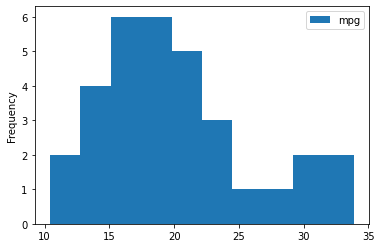

In [39]:
df_cars.plot.hist(y = "mpg")

We can choose how refined the histogram is by changing the number of bins.

<AxesSubplot:ylabel='Frequency'>

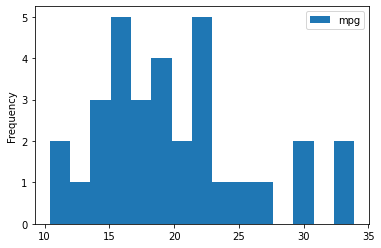

In [46]:
df_cars.plot.hist(y = "mpg", bins = 15)

In [44]:
?df_cars.plot.hist

We can format the plot by adding a title and changing the colors.

<AxesSubplot:title={'center':'Histogram of MPG'}, ylabel='Frequency'>

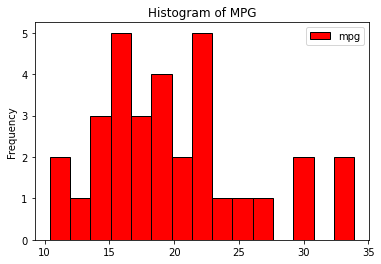

In [41]:
df_cars.plot.hist(y = "mpg", bins = 15, title = "Histogram of MPG", color = "red", edgecolor = "black")

We can also combine the histogram with `groupby`.

am
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

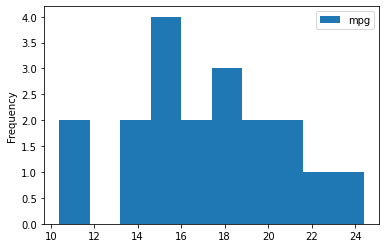

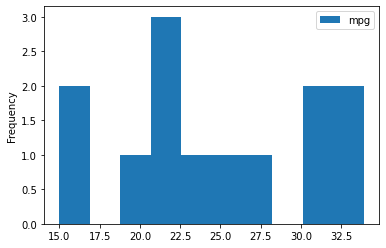

In [42]:
df_cars.groupby("am").plot.hist(y="mpg")

This is not ideal, as we cannot change legends, or the labels to make the figures look better.
To do that, we need the `matplotlib` package.

## Scatter Plot

Below we create a scatter plot of two variables in the data.

<AxesSubplot:title={'center':'Scatterplot of MPG vs. Horsepower'}, xlabel='hp', ylabel='mpg'>

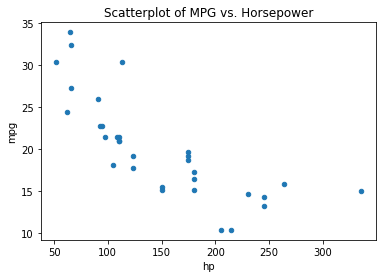

In [43]:
df_cars.plot.scatter(x="hp", y="mpg", xlabel="Horsepower", ylabel="Miles per Gallon", title="Scatterplot of MPG vs. Horsepower")
#df_cars.plot.scatter(x="hp", y="mpg", title="Scatterplot of MPG vs. Horsepower")

- A Pandas cheat sheet for reference: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf